## Dragon Real Estate - Price Pridictor


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
housing = pd.read_csv('data.csv')

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
housing = housing.fillna(0)

In [6]:
housing['RAD']=housing['RAD'].astype(np.int64)
housing['CHAS']=housing['CHAS'].astype(np.int64)
housing['TAX']=housing['TAX'].astype(np.int64)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    int64  
 9   TAX      507 non-null    int64  
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.6 KB


In [8]:
housing['CHAS'].value_counts()

0    472
1     35
Name: CHAS, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.606396,11.341223,11.114813,0.069034,0.553601,6.272239,68.439645,3.787557,9.530572,407.431953,18.419132,355.970533,12.628107,22.488363
std,8.594540,23.304861,6.871394,0.253762,0.118355,0.755379,28.285467,2.110369,8.708984,169.343842,2.312906,92.569975,7.156099,9.242348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.081930,0.000000,5.160000,0.000000,0.449000,5.884500,44.700000,2.094100,4.000000,279.000000,17.350000,375.270000,6.925000,16.900000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208000,77.300000,3.199200,5.000000,330.000000,19.000000,391.430000,11.340000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.622000,94.050000,5.164950,24.000000,666.000000,20.200000,396.220000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

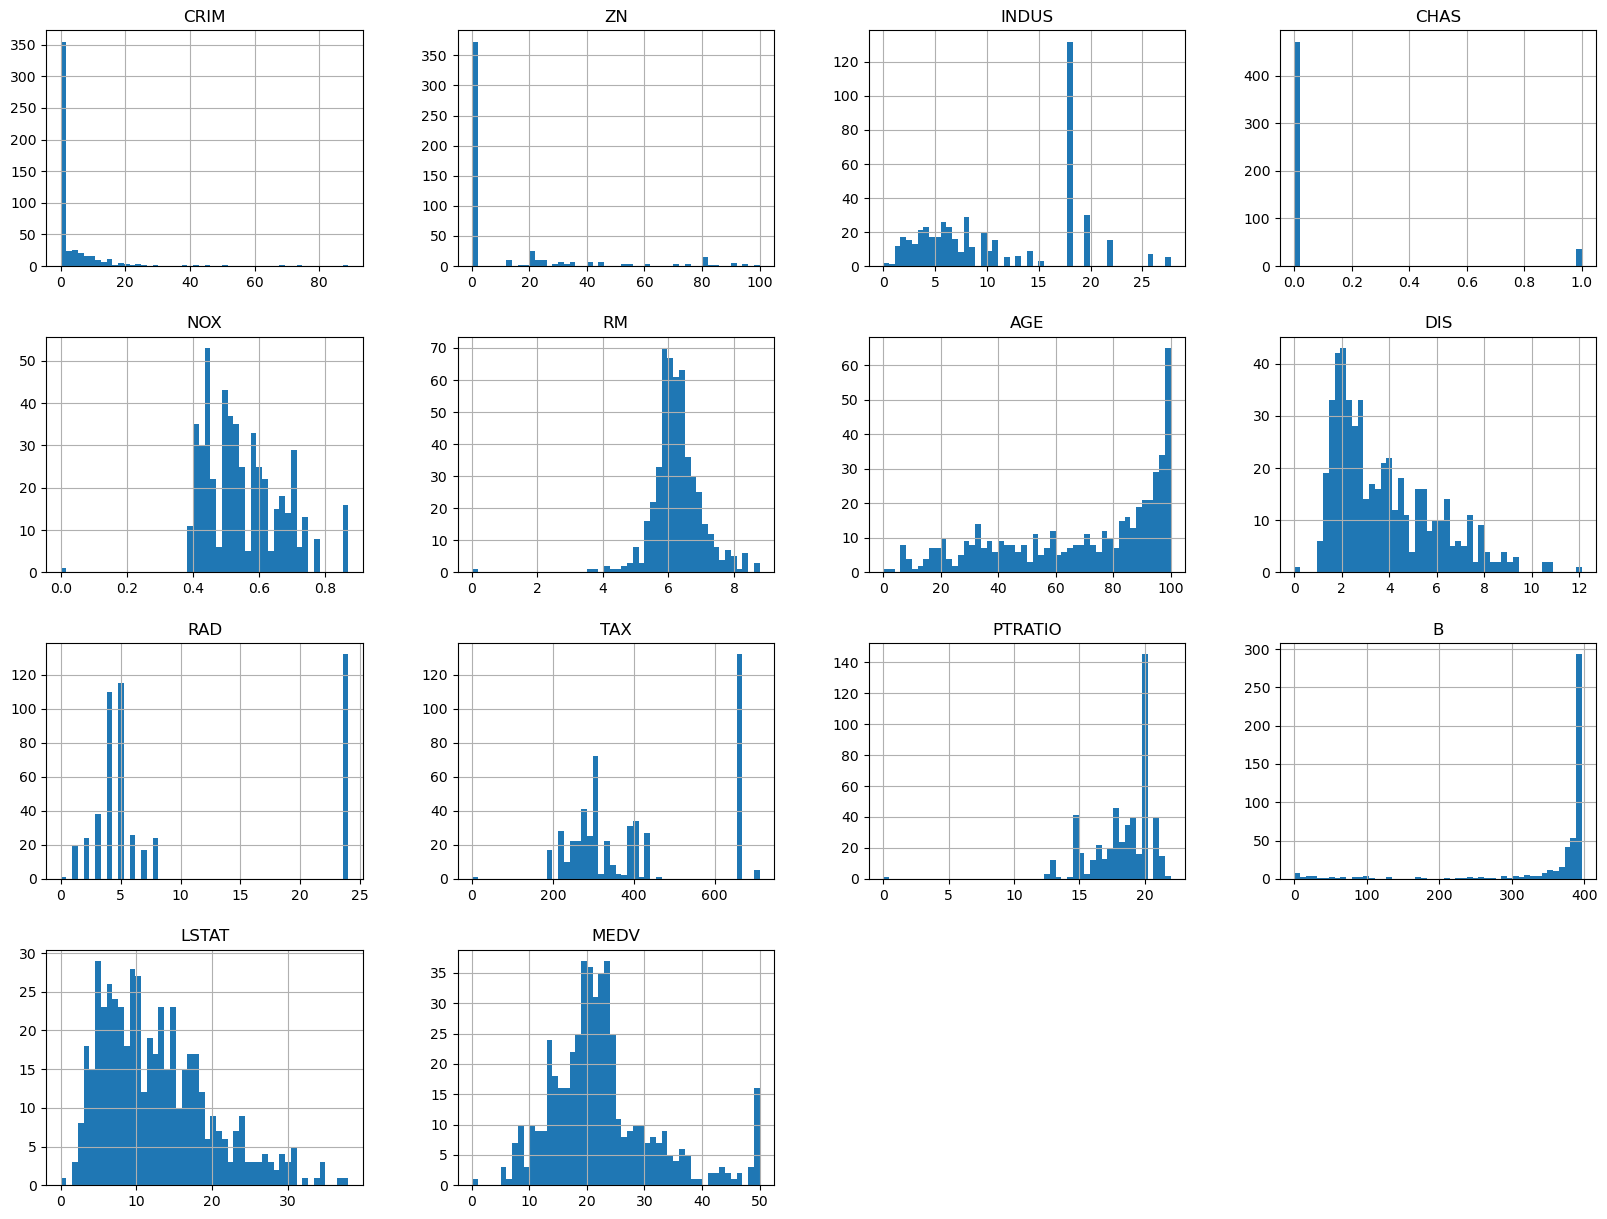

In [11]:
#for plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize = (20,15))

## Train -Test Splitting


In [12]:
#for learnuing purpose
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
#train_set,test_set = split_train_test(housing, 0.2)

In [14]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 405
Rows in test set:102



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    377
1     28
Name: CHAS, dtype: int64

In [19]:
#95/7

In [20]:
#377/28

In [21]:
housing = strat_train_set.copy()

## Looking for Correlations

In [22]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677192
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
LSTAT     -0.736915
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

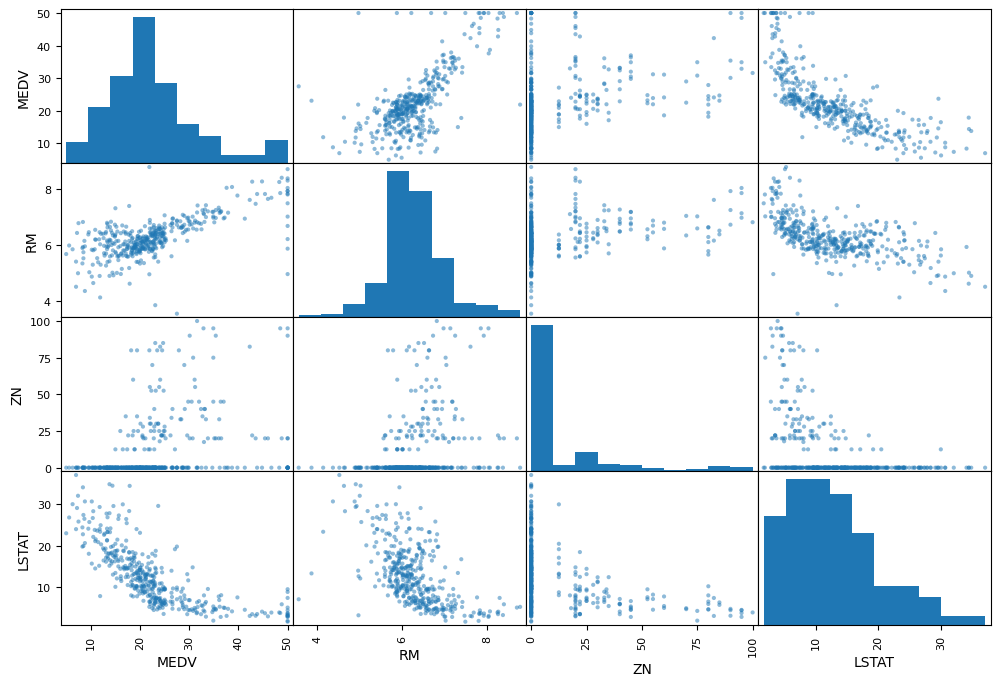

In [23]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

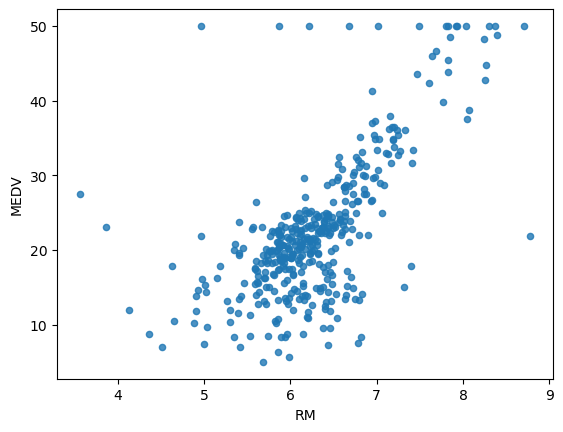

In [24]:
housing.plot(kind="scatter",x="RM",y = "MEDV",alpha=0.8)

##  Trying out Attributes combinations

In [25]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1,62.266904
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0,43.497173
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6,50.520567
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,71.606254
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00,21.7,61.985472


In [27]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677192
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
TAXRM     -0.519506
LSTAT     -0.736915
Name: MEDV, dtype: float64

In [28]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [29]:
housing.shape

(405, 13)

# Missing Attribute

In [30]:
#to take care of missing attribute:
#    1. get rid of missi ng data  points
#   2.get rid of whole attribute
#    3.set the value to some value(0,mean or median)

In [31]:
a = housing.dropna(subset=['RM'])#option 1
a.shape
#original housing df will remain unchanged

(405, 13)

In [32]:
housing.drop("RM",axis=1).shape #option2
# note that there is no RM column and also original housing df will remain unchanged

(405, 12)

In [33]:
median = housing["RM"].median()#compute median for option3

In [34]:
housing["RM"].fillna(median)#option3
#original housing df will remain unchanged

104    6.167
240    6.897
174    5.859
146    5.628
110    6.195
       ...  
142    5.403
114    6.254
178    6.860
321    6.376
234    6.726
Name: RM, Length: 405, dtype: float64

In [35]:
housing.shape

(405, 13)

In [36]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.279914,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.708024,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.880000,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
housing.shape

(405, 13)

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 104 to 234
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     405 non-null    float64
 1   ZN       405 non-null    float64
 2   INDUS    405 non-null    float64
 3   CHAS     405 non-null    int64  
 4   NOX      405 non-null    float64
 5   RM       405 non-null    float64
 6   AGE      405 non-null    float64
 7   DIS      405 non-null    float64
 8   RAD      405 non-null    int64  
 9   TAX      405 non-null    int64  
 10  PTRATIO  405 non-null    float64
 11  B        405 non-null    float64
 12  LSTAT    405 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.3 KB


In [39]:
housing.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
104,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False
321,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
104,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False
321,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
np.isinf(housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
104,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False
321,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [43]:
imputer.statistics_

array([2.8392e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2090e+00, 7.7700e+01, 3.1323e+00, 5.0000e+00, 3.3700e+02,
       1.9000e+01, 3.9095e+02, 1.1480e+01])

In [44]:
X= imputer.transform(housing)

In [45]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [46]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.279914,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.708024,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.880000,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily , threee types of objects
1. Estimators-it estimates some parameter based on a dataset Eg.imputer
It has a fit method and trANSFORM method
Fit method - fits the dataset and calculates internal parameters


2.Transformers- transform method take input and return output based on the learnings from fit().It also has a convenience fucntion called fir_transform()
which fits an thn transforms


3.Predictors - LinearRegrssion model is an exapmle of predictors.fit() and predict() ae two common functions.It also gives score() function which will evaluate the predictions

## Feature Scaling

Primarly ,two types of feature scaling methods:
1. Min-Max scaling(Normalization)
     (value - min)/(max - min)
     Sklearn provides a class called MinMAx scaler for this
2. Standarization
      (value - mean)/std
      sklearn provides a class standard scaler for this
    

## Creating a Pipeline


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #  .....addd as many as want in ur pipeline
    ('std_scaler',StandardScaler())
    
])


In [48]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [49]:
housing_num_tr.shape

(405, 13)

## Selecting a desired model for Dragon Real Estates

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [51]:
some_data = housing.iloc[:5]

In [52]:
some_labels = housing_labels.iloc[:5]


In [53]:
prepared_data = my_pipeline.transform(some_data)

In [54]:
model.predict(prepared_data)

array([20.015, 24.367, 21.908, 15.796, 21.636])

In [55]:
list(some_labels)

[20.1, 22.0, 22.6, 15.6, 21.7]

## Evaluating the model

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
#lin_mse= mean_squared_error(housing_labels,housing_predictions)
#lin_rmse = np.sqrt(lin_mse)
mse= mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)


In [57]:
#lin_mse

In [58]:
rmse

1.1939579277903105

# using better evaluation techinique - cross validation

In [59]:
# 1 2 3 4 5  6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [60]:
rmse_scores

array([2.94962393, 3.09582996, 4.78679837, 3.11485126, 2.84520241,
       2.75696478, 3.8136372 , 3.10257219, 4.56296681, 2.72650137])

In [61]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [62]:
print_scores(rmse_scores)

Scores: [2.94962393 3.09582996 4.78679837 3.11485126 2.84520241 2.75696478
 3.8136372  3.10257219 4.56296681 2.72650137]
Mean:  3.375494826137051
Standard deviation:  0.7127985975527904


# saving the model

In [63]:
from joblib import dump,load
dump(model,'Dragon.joblib')


['Dragon.joblib']

# Testing the model on test data

In [64]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

In [65]:
final_rmse

4.793050328442254

In [66]:
prepared_data[0]

array([-0.4286928 , -0.48908114, -0.4050388 , -0.27252625, -0.32754745,
       -0.15967435,  0.75494174, -0.63432391, -0.54467747, -0.16577833,
        1.13740278,  0.40915639, -0.05646069])

## Using the model

In [71]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.4286928 , 7.48908114, -0.4050388 , -4.27252625, -0.32754745,
       60.6516541,  0.75494174, -0.63432391, -6.54467747, -0.16577833,
        1.13740278,  0.40915639, -0.05646069]])
model.predict(features)

array([33.789])